<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Martín Sepúlveda
- Nombre de alumno 2: Maximiliano Varas


### **Link de repositorio de GitHub:** [Enlace](https://github.com/mvarasg/labs-sepulveda-varas)

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [3]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
import sys
#!{sys.executable} -m pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

     --------------------------------------- 15.5/15.5 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.14.1
    Uninstalling plotly-5.14.1:
      Successfully uninstalled plotly-5.14.1


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [4]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [4]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

Primero vemos que solo hay nulos en la columna ```National_Position```, tal como se esperaba:

In [5]:
df_players.isna().sum()

Name                     0
Nationality              0
National_Position    16513
Club_Position            1
Height                   0
Weight                   0
Preffered_Foot           0
Age                      0
Work_Rate                0
Weak_foot                0
Skill_Moves              0
Ball_Control             0
Dribbling                0
Marking                  0
Sliding_Tackle           0
Standing_Tackle          0
Aggression               0
Reactions                0
Interceptions            0
Vision                   0
Composure                0
Crossing                 0
Short_Pass               0
Long_Pass                0
Acceleration             0
Speed                    0
Stamina                  0
Strength                 0
Balance                  0
Agility                  0
Jumping                  0
Heading                  0
Shot_Power               0
Finishing                0
Long_Shots               0
Curve                    0
Freekick_Accuracy        0
P

Se procede a crear el label que agrega la columna ```Seleccionado```, donde un 1 indica que sí lo es y un 0 no.

In [6]:
### Código aquí ###
df_players['Seleccionado'] = np.where(df_players['National_Position'].notnull(), 1, 0)
print(f'Hay {len(df_players[df_players["Seleccionado"] == 1])} seleccionados y \
{len(df_players)-len(df_players[df_players["Seleccionado"] == 1])} no seleccionados.')
df_players


Hay 1075 seleccionados y 16513 no seleccionados.


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


De lo anterior, se obtiene que hay 1075 seleccionados y 16513 no seleccionados, por lo que hay un claro desbalance entre las clases. Esto es un resultado esperado dado que no todos los jugadores pueden jugar en su seleccionado nacional.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [7]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

**Respuesta:**

In [60]:

column_transformer = ColumnTransformer(
    transformers = [('escalar', MinMaxScaler(), ['Height','Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression', 'Reactions', 'Vision', 
                                                   'Composure', 'Acceleration', 'Speed', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties', 'Volleys']),
                      ('power', PowerTransformer(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Interceptions', 
                                                     'Crossing', 'Short_Pass', 'Long_Pass', 'Stamina', 'Heading', 'Shot_Power', 'Finishing',
                                                       'Long_Shots', 'Curve','Freekick_Accuracy']),
                      ('ordinal', OneHotEncoder(),[ 'Club_Position', 'Preffered_Foot', 'Work_Rate' ])])

**justificar columnas**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 

RF = RandomForestClassifier(max_depth=5, random_state=0)
SVM = SVC()
KNN = KNeighborsClassifier()

pipeline_RF = Pipeline([
    ('column_transformer', column_transformer),
    ('classifier', RF)
])

pipeline_SVM = Pipeline([
    ('column_transformer', column_transformer),
    ('classifier', SVM)
])

pipeline_KNN = Pipeline([
    ('column_transformer', column_transformer),
    ('classifier', KNN)
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def pipline_classifer(list_pipeline, df):
    X_train, X_test, y_train, y_test = train_test_split(df, df['Seleccionado'], test_size=0.3, random_state=0)
    
    for pipeline, name in list_pipeline:

        transformed_data = pipeline.fit(X_train, y_train)

        predictions = transformed_data.predict(X_test)
                
        cm = confusion_matrix(y_test, predictions, normalize='true')
        classes = unique_labels(y_test, predictions)

        print(f'Resultados Clasificador {name}:')
        df = pd.DataFrame(cm, index=classes, columns=classes)

        g = sns.heatmap(df, annot=True, cmap="Blues")
        g.set_yticklabels(g.get_yticklabels(), rotation=0)

        plt.title('Confusion matrix \n')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.autoscale()
        plt.show()

        print(classification_report(y_test, predictions))

    return

Resultados Clasificador KNN


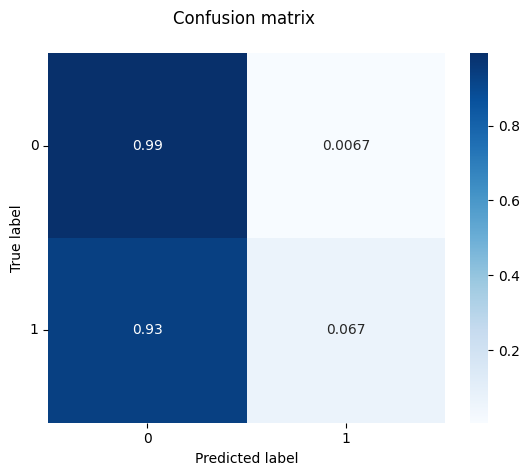

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4962
           1       0.39      0.07      0.11       315

    accuracy                           0.94      5277
   macro avg       0.67      0.53      0.54      5277
weighted avg       0.91      0.94      0.92      5277

Resultados Clasificador Random Forest


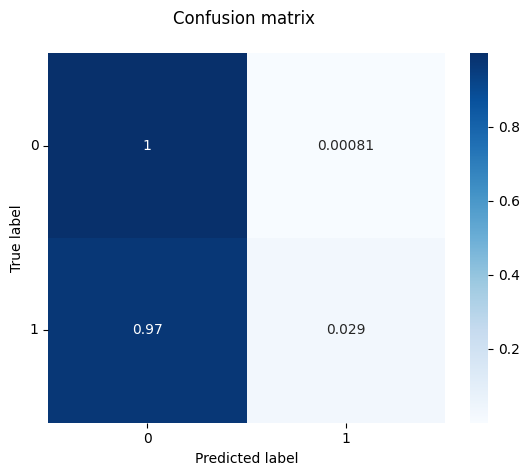

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4962
           1       0.69      0.03      0.05       315

    accuracy                           0.94      5277
   macro avg       0.82      0.51      0.51      5277
weighted avg       0.93      0.94      0.92      5277

Resultados Clasificador SVM


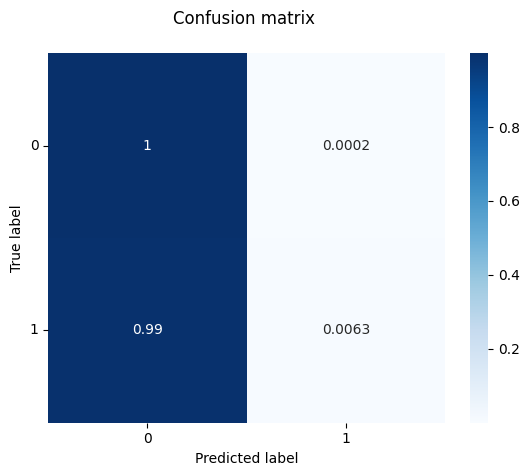

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4962
           1       0.67      0.01      0.01       315

    accuracy                           0.94      5277
   macro avg       0.80      0.50      0.49      5277
weighted avg       0.92      0.94      0.91      5277



In [82]:
pipline_classifer([[pipeline_KNN, 'KNN'], [pipeline_RF, 'Random Forest'], [pipeline_SVM, 'SVM']], df_players)

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [87]:
map = {
    'ST': 'ataque',
    'CF': 'ataque',
    'RW': 'central_ataque',
    'CAM': 'central_ataque',
    'LW': 'central_ataque',
    'RM': 'central',
    'CM': 'central',
    'LM': 'central',
    'RWB': 'central_defensa',
    'CDM': 'central_defensa',
    'LWB': 'central_defensa',
    'RB': 'defensa',
    'CB': 'defensa',
    'LB': 'defensa',
    'GK': 'arquero'
}


df_players['Posicion'] = df_players['Club_Position'].map(map)
df_players_1 = df_players.dropna(subset=['Posicion'])

In [112]:
print(df_players_1['Posicion'].value_counts())
px.bar(df_players_1['Posicion'])

Posicion
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


Resultados Clasificador:


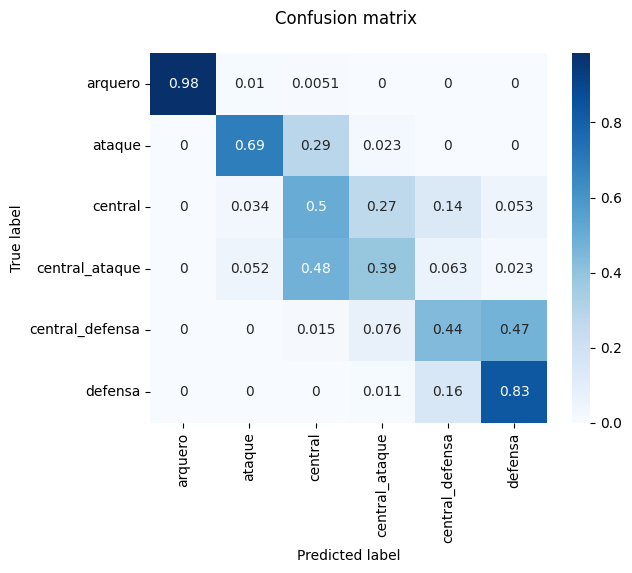

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       197
           1       0.82      0.69      0.75       132
           2       0.52      0.50      0.51       265
           3       0.44      0.39      0.41       174
           4       0.22      0.44      0.29        66
           5       0.86      0.83      0.84       348

    accuracy                           0.68      1182
   macro avg       0.64      0.64      0.63      1182
weighted avg       0.70      0.68      0.69      1182



In [107]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

column_transformer = ColumnTransformer(
    transformers = [('escalar', MinMaxScaler(), ['Height','Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression', 'Reactions', 'Vision', 
                                                   'Composure', 'Acceleration', 'Speed', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties', 'Volleys']),
                      ('power', PowerTransformer(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Interceptions', 
                                                     'Crossing', 'Short_Pass', 'Long_Pass', 'Stamina', 'Heading', 'Shot_Power', 'Finishing',
                                                       'Long_Shots', 'Curve','Freekick_Accuracy']),
                      ('ordinal', OneHotEncoder(),['Preffered_Foot', 'Work_Rate' ])])

SVR = SVR()

pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('classifier', SVR)
])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_players_1['Posicion'])

X_train, X_test, y_train, y_test = train_test_split(df_players_1, y_encoded, test_size=0.3, random_state=0)


transformed_data = pipeline.fit(X_train, y_train)

predictions = abs(transformed_data.predict(X_test).round())
        
cm = confusion_matrix(y_test, predictions, normalize='true')
classes = unique_labels(df_players_1['Posicion'])

print(f'Resultados Clasificador:')
df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.autoscale()
plt.show()

print(classification_report(y_test, predictions))

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [155]:
df_sueldos = pd.read_csv('salarios.csv',usecols = ['Player','Weekly Salary'])
df_sueldos['log_salary'] = np.log(df_sueldos['Weekly Salary'])

fig = px.histogram(df_sueldos, x="log_salary")
fig.show()

df_merged = df_players.merge(df_sueldos,
                         left_on=['Name'], how='inner', right_on=['Player'])

In [156]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

column_transformer = ColumnTransformer(
    transformers = [('escalar', MinMaxScaler(), ['Height','Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression', 'Reactions', 'Vision', 
                                                   'Composure', 'Acceleration', 'Speed', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties', 'Volleys']),
                      ('power', PowerTransformer(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Interceptions', 
                                                     'Crossing', 'Short_Pass', 'Long_Pass', 'Stamina', 'Heading', 'Shot_Power', 'Finishing',
                                                       'Long_Shots', 'Curve','Freekick_Accuracy']),
                      ('ordinal', OneHotEncoder(),['Club_Position', 'Preffered_Foot', 'Work_Rate' ])])

SVR = SVR(kernel = 'rbf')

pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('classifier', SVR)
])

y_log = np.log(df_merged['Weekly Salary'])
X_train, X_test, y_train, y_test = train_test_split(df_merged, y_log, test_size=0.3, random_state=0)


transformed_data = pipeline.fit(X_train, y_train)

predictions = transformed_data.predict(X_test)

transformed_data.score(X_test, y_test)

0.5348117389458102

In [157]:

X_test['pred'] = predictions
fig = px.histogram(X_test, x=["log_salary","pred"], barmode = "group")
fig.show()


**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>